# ADS - Network analysis module. Homework 2

In [9]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


load assingment data

In [10]:
dataA=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkA.csv' , header=0 )
XY=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkA_XY.csv' , header=0 )

In [11]:
dataB=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/networkB.csv' , header=0 )
PB=pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework2/PB.csv' , header=0 )

## Problem 1 (20% of credit)

Find and visualize shortest path between nodes 1 and 20 in the above spatial network A in terms of
a) network topology
b) spatial distance

In [12]:
dataA.head()

,Unnamed: 0,a,b,w
0,0,0,33,90.500690
1,1,0,4,39.631544
2,2,0,37,85.762845
3,3,0,6,92.084127
4,4,0,40,22.127153


In [13]:
XY.head()

,Unnamed: 0,X,Y
0,0,0.635022,1.735313
1,1,8.586500,-0.953554
2,2,-0.630373,4.778164
3,3,5.016627,-5.024614
4,4,5.626680,2.515136


### 1) Network Topology 

In [14]:
G=nx.from_pandas_dataframe(dataA, u'a', u'b', u'w',create_using=nx.DiGraph())

In [15]:
pos = nx.spring_layout(G)

/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/Users/luke/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


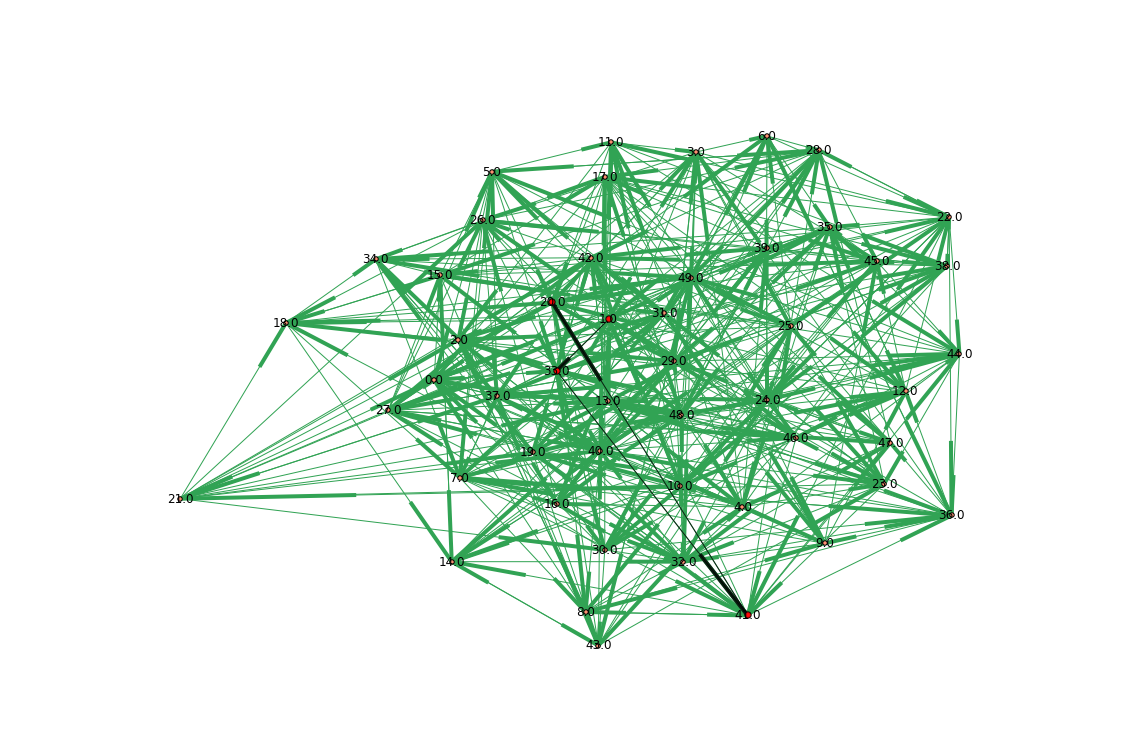

In [16]:
ax1 = plt.figure(figsize=(15,10))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=True,node_size=20,width=1,edge_color='#31a354')
path = nx.shortest_path(G,source=1,target=20,weight='w')
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G,pos,nodelist=path,node_size=40,node_color='r',alpha=0.9)
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='k',width=1,alpha=0.8)

In [17]:
print path 

[1, 33.0, 41.0, 20.0]


### 2) spatial distance

In [18]:
#auxiliary function: geodesic distance on the Earth surface between two lat-long points
from math import sin, cos, sqrt, atan2, radians
def geodist(lon1,lat1,lon2,lat2):
    lat1 = lat1
    lon1 = lon1  
    lat2 = lat2
    lon2 = lon2
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    # c = 2 * atan2(sqrt(a), sqrt(1 - a))
    a = sqrt((dlon**2) + (dlat**2))
    return a

In [19]:
geodist(0.6,0.7,8.5,-0.9)

8.060397012554654

In [20]:
dis = []
for i in range(len(dataA)):
    a_x = XY.X[int(dataA.a[int(i)])]
    a_y = XY.Y[int(dataA.a[int(i)])]
    b_x = XY.X[int(dataA.b[int(i)])]
    b_y = XY.Y[int(dataA.b[int(i)])]
    distance = geodist(a_x,a_y,b_x,b_y)
    dis.append(distance)

In [21]:
dataA_d = {'a':dataA.a,'b':dataA.b,'dist':dis,'weight':dataA.w}
dataA_d = pd.DataFrame(dataA_d)

In [22]:
G1=nx.from_pandas_dataframe(dataA_d, u'a', u'b', [u'dist',u'weight'],create_using=nx.DiGraph())

In [23]:
pos = nx.spring_layout(G1)

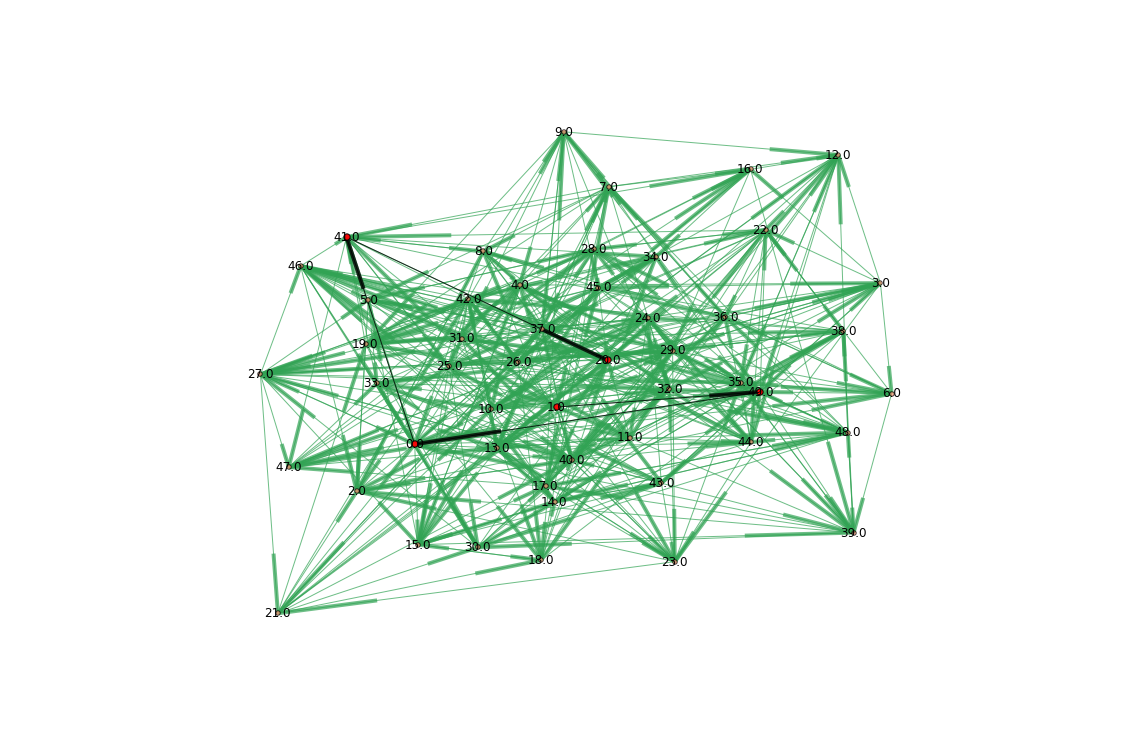

In [24]:
ax1 = plt.figure(figsize=(15,10))
nx.draw(G1,pos,node_color='#fc9272',with_labels=True,node_size=20,width=1,edge_color='#31a354',alpha=0.7)
path = nx.shortest_path(G1,source=1,target=20,weight='dist')
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G1,pos,nodelist=path,node_color='r',node_size=40,alpha=0.9)
nx.draw_networkx_edges(G1,pos,edgelist=path_edges,edge_color='k',width=1,alpha=0.8)

In [25]:
print nx.shortest_path(G1,source=1,target=20,weight='dist')

[1, 49.0, 0.0, 41.0, 20.0]


## Problem 2 (20% of credit)

In the above spatial network A (defined by a weighted edge list dataA and nodes spatial locations XY) find the pair of nodes with the higest shortest path length between them in terms of network topology. Visualize the shortest path between the two nodes

In [114]:
temp = 0
len_list = []
for i in range(50):
    for j in range(50):
        length = nx.shortest_path_length(G1,source=i,target=j,weight='weight')
        len_list.append(length)
        if length >= temp:
            temp = length 
            a = i 
            b = j
            print a,b,length

0 0 0
0 1 111.456785475
0 5 127.461159289
0 11 134.260334017
0 45 163.920006697
1 20 164.608188329
2 20 165.744861923
2 45 182.150844478
5 6 219.071452317


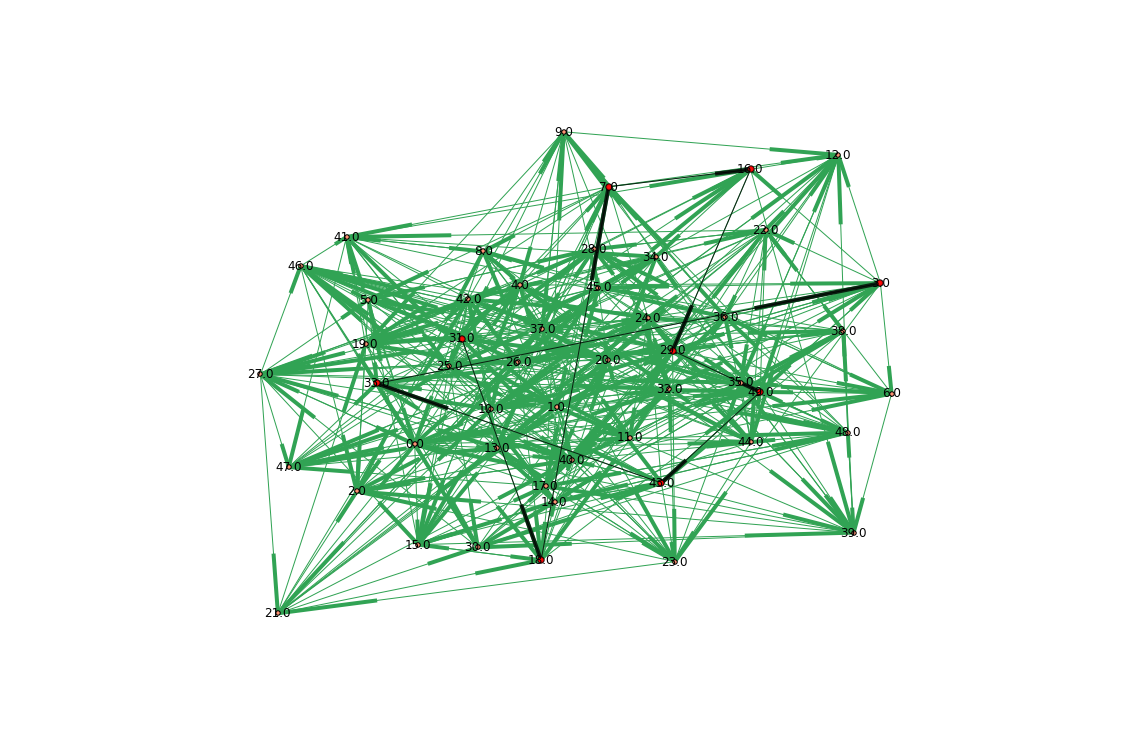

In [115]:
ax1 = plt.figure(figsize=(15,10))
np.random.seed(1335) 
nx.draw(G,pos,node_color='#fc9272',with_labels=True,node_size=20,width=1,edge_color='#31a354')
path = nx.shortest_path(G1,source=31,target=3,weight='weight')
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G1,pos,nodelist=path,node_size=40,node_color='r',alpha=0.9)
nx.draw_networkx_edges(G1,pos,edgelist=path_edges,edge_color='k',width=1,alpha=0.8)

## Problem 3 (30% of credit)

For the above spatial network B (defined by a weighted edge list dataB, nodes spatial locations XY) with given weigths $w$ from PB, fit the gravity model (over the entire network) 
$$
e(a,b)=k\cdot w(a)^\alpha w(b)^\beta d(a,b)^{-\gamma},
$$
report the exponents $\alpha$, $\beta$, $\gamma$ and the statistics for the model fit. Visualize the model fit.

In [116]:
dataB.head()

,a,b,w
0,0,1,0.056917
1,0,2,0.042925
2,0,3,0.012604
3,0,4,0.073283
4,0,5,0.002843


In [117]:
PB.head()

,P,n
0,15.210213,0
1,15.693742,1
2,3.679680,2
3,9.553264,3
4,11.749185,4


In [118]:
dataB = dataB[['a','b','w']]

In [119]:
PB = pd.DataFrame({'n':range(50),'P':PB['P']})

In [120]:
dis = []
for i in range(len(dataB)):
    a_x = XY.X[int(dataB.a[int(i)])]
    a_y = XY.Y[int(dataB.a[int(i)])]
    b_x = XY.X[int(dataB.b[int(i)])]
    b_y = XY.Y[int(dataB.b[int(i)])]
    distance = geodist(a_x,a_y,b_x,b_y)
    dis.append(distance)

In [121]:
dataB_d = pd.DataFrame({'a':dataB['a'],'b':dataB['b'],'dist':dis,'weight':dataB['w']})

In [122]:
da = range(50)
db = range(50)
dd = 0
dw = 0
dab = pd.DataFrame({'a':da,'b':db,'dist':dd,'weight':dw})

In [123]:
dataset = [dataB_d,dab]
dataB_c = pd.concat(dataset)

In [124]:
dataB_d.head()

,a,b,dist,weight
0,0,1,8.393808,0.056917
1,0,2,3.295477,0.042925
2,0,3,8.055748,0.012604
3,0,4,5.052205,0.073283
4,0,5,10.428571,0.002843


In [125]:
G2=nx.from_pandas_dataframe(dataB_d, u'a', u'b', ['weight','dist'],create_using=nx.DiGraph())

In [126]:
DE=pd.DataFrame({'d':[],'e':[]})
for e in G2.edges(data=True):
    i=DE.index.max()
    if isnan(i):
        i=-1
    DE.loc[i + 1] = [e[2]['dist'], e[2]['weight']]

In [127]:
DE.head()

,d,e
0,8.393808,0.056917
1,3.295477,0.042925
2,8.055748,0.012604
3,5.052205,0.073283
4,10.428571,0.002843


In [40]:
dataB_w={}
for k in PB.index:
    dataB_w[k]=PB.P[k]

In [41]:
G2_w = dataB_w

In [42]:
G3_w = dataB_w

In [43]:
G2_wout=G2.out_degree(weight='weight')
G2_win=G2.in_degree(weight='weight')

In [45]:
data1=pd.DataFrame({'d':[],'e':[],'w1':[],'w2':[]})
for e in G2.edges(data=True):
    i=data1.index.max()
    if isnan(i):
        i=-1
    data1.loc[i + 1] = [e[2]['dist'], e[2]['weight'], dataB_w[e[0]], dataB_w[e[1]]]

In [46]:
data1.head()

,d,e,w1,w2
0,8.393808,0.056917,15.210213,15.693742
1,3.295477,0.042925,15.210213,3.679680
2,8.055748,0.012604,15.210213,9.553264
3,5.052205,0.073283,15.210213,11.749185
4,10.428571,0.002843,15.210213,3.222301


In [130]:
data2 = data1.loc[(data1.d>0)&(data1.e>0)&(data1.w1>0)&(data1.w2>0)]
data2.head()

,d,e,w1,w2
0,8.393808,0.056917,15.210213,15.693742
1,3.295477,0.042925,15.210213,3.679680
2,8.055748,0.012604,15.210213,9.553264
3,5.052205,0.073283,15.210213,11.749185
4,10.428571,0.002843,15.210213,3.222301


                            OLS Regression Results                            
Dep. Variable:                 log(e)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2159.
Date:                Tue, 08 Dec 2015   Prob (F-statistic):               0.00
Time:                        11:01:01   Log-Likelihood:                -3198.6
No. Observations:                2450   AIC:                             6405.
Df Residuals:                    2446   BIC:                             6428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.0960      0.120    -42.518      0.0

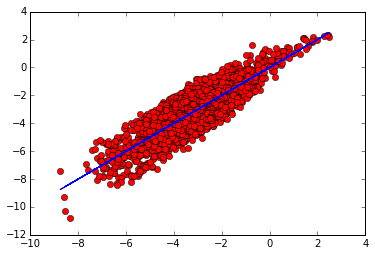

In [131]:
lm = smf.ols(formula='log(e) ~ log(d)+log(w1)+log(w2)', data = data2).fit()
print(lm.summary())
lme = lm.predict(data2)
plt.plot(lme,log(data2.e),'or')
plt.plot(lme,lme,'-b') 

## Problem 4 (30% of credit)

For the above spatial network B with given weigths $w$ and given the total strength of outgoing edges $T(a)$ estimated from the network data for each node $a$, fit the locally normalized model (over the entire network)
$$
e(a,b)=T(a) \frac{w(b)^\beta d(a,b)^{-\gamma}}{\sum_{c\neq a} w(c)^\beta d(a,c)^{-\gamma}},
$$
report the exponents $\beta$, $\gamma$. Estimate $R2$ for the fit in the log-scale of the original network. Visualize the model fit.

In [104]:
G3=nx.from_pandas_dataframe(dataB_c, u'a', u'b', ['weight','dist'],create_using=nx.DiGraph())

In [137]:
# function locally normalized gravity model fit (in terms of log-scale R2) for given exponents q
def LNGmodel(q):
    #first pass - assign relative weights as the model prediction
    for e in G3.edges():
        if e[0]!=e[1]:
            G3[e[0]][e[1]]['predict']=(G3[e[0]][e[1]]['dist']**q[0])*(G3_w[e[1]]**q[1])
        else:
            G3[e[0]][e[1]]['predict']=G3[e[0]][e[1]]['weight']
            
    #compute normalization factors    
    G3_norm=G3.out_degree(weight='predict')
    G3_wout=G3.out_degree(weight='weight')
    for a in range(50):
        G3_norm[a]=(G3_wout[a])/(G3_norm[a])
    #second pass - normalize model predictions   
    E=np.array([0.0]*G3.size()) 
    me=np.array([0.0]*G3.size())
    i=0
    for e in G3.edges():
        if e[0]!=e[1]:
            G3[e[0]][e[1]]['predict']*=G3_norm[e[0]]
            #print(USmig[e[0]][e[1]]['weight'],USmig[e[0]][e[1]]['predict'])
            E[i]=G3[e[0]][e[1]]['weight']
            me[i]=G3[e[0]][e[1]]['predict']
            i+=1
    E=E[0:i]
    me=me[0:i]
    me=me[E>0]
    E=E[E>0]
    R2=1-sum(pow(log(E)-log(me),2))/sum(pow(log(E)-mean(log(E)),2))    
    return (R2,E,me) #performance and edge weights-predictions for fit visualization purposes 

In [106]:
G3[0][0]

{'dist': 0.0, 'weight': 0.0}

In [107]:
def LNGmodelFit(q):
    #version for maximization
    return -LNGmodel(q)[0]

In [138]:
#fit model parameters
res=optimize.minimize(LNGmodelFit,[0, 1],method='Nelder-Mead')

In [140]:
res

  status: 0
    nfev: 140
 success: True
     fun: -0.98340992676071659
       x: array([-2.02918714,  1.48657092])
 message: 'Optimization terminated successfully.'
     nit: 77

In [135]:
(R2,e,me)=LNGmodel(res.x)

In [141]:
R2

0.98340992676071659

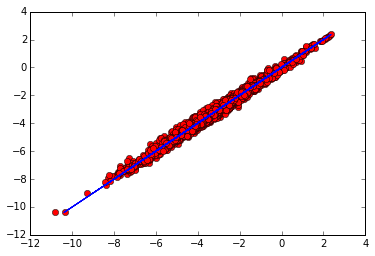

In [136]:
plt.plot(log(e),log(me),'or')
plt.plot(log(me),log(me),'-b')

## Extracredit assignment (additional 50% of credit to be applied to this or any past assignment)

Implement radiation model and apply it to US migration data. Visualize the fit. Compare it (visually and quantitatively (R2)) to that of the gravity models with global and local normalization (fitted over the entire dataset).